# **Milestone** | Exploratory Analysis of Olympic Athletes


<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/2560px-Olympic_rings_without_rims.svg.png" alt="The Olympic Rings" width="320"/>
</div>



# Introduction

In this Milestone, you will analyze a dataset containing information on Olympic medalists from 1896 to 2016. Your goal is to apply practical data analysis skills to explore trends, clean inconsistencies, and generate insights that will support data-driven journalism about the athletes, countries, and events that have shaped Olympic history.


### Dataset Description

You will use the `olympics.csv` dataset in the `datasets` folder to complete your analysis. Every row represents one athlete's participation in a specific Olympic event. The dataset contains the following columns:

* **ID**: A unique identifying number of each athlete
* **Name**: The name of each athlete
* **Sex**: M or F
* **Age**: The age of an athlete, in years
* **Height**: The height of an athlete, in centimeters
* **Weight**: The weight of an athlete, in kilograms
* **Team**: The name of the athlete’s team. Not always the name of a country.
* **NOC**: National Olympic Committee’s 3 letter code
* **Games**: Year and season
* **Season**: Summer or Winter
* **City**: Host city
* **Sport**: The  or category of olympic event/activity
* **Event**: specific event within a sport, e.g. Men’s 400 meters breaststroke.
* **Medal**: Gold, Silver, Bronze
* **Region**: Name of athlete’s country


To start, import the pandas library, load the data into a DataFrame and preview the first 5 rows.

In [117]:
# import the pandas library
import pandas as pd

# load the data into a dataframe
olympics_df = pd.read_csv('datasets/olympics.csv')

# preview the dataframe
olympics_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
1,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
4,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland


## Task 1: Data Inspection
Start by inspecting the dataset to understand its structure and the types of questions you can ask. You'll familiarize yourself with the data columns and initial statistics.

In [118]:
# Inspect the numbers of rows and columns
df_rows = olympics_df.shape[0]
df_columns = olympics_df.shape[1]
print(f"Rows:\t\t{df_rows:,.0f}\nColumns:\t{df_columns}")

Rows:		39,783
Columns:	16


In [119]:
# Print out all the column names
olympics_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'],
      dtype='object')

In [120]:
# Inspect column data types, null values, and other info
olympics_df.info

<bound method DataFrame.info of            ID                                 Name Sex   Age  Height  Weight  \
0           4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
1          15                 Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
2          15                 Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
3          16             Juhamatti Tapio Aaltonen   M  28.0   184.0    85.0   
4          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
...       ...                                  ...  ..   ...     ...     ...   
39778  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
39779  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
39780  135554                         Bogusaw Zych   M  28.0   182.0    82.0   
39781  135563            Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
39782  135563            Olesya Nikolayevna Zykina   F  23.0   171.0    64.0   

       

As you're reviewing the .info() output from the dataset, you should notice there are missing values some of the columns! Ask ChatGPT to recommend approaches for dealing with missing data in your analysis.

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> I’m working with a dataset of Olympic medalists, and I’ve noticed some missing values in columns like Age, Height, Weight, and Region. I’m planning to ignore these missing values. Is this a reasonable approach for my analysis, or are there any important considerations I should be aware of before doing so?


  </span>
</div>

In [121]:
# Use unique() to examine the types of medals in the dataset.
olympics_df["Medal"].unique()

array(['Gold', 'Bronze', 'Silver'], dtype=object)

## Task 2: Data Cleaning
Now that we have a sense of the data, let's clean it to make sure it's ready for analysis.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>When renaming/dropping columns, make sure to assign the result back to the dataframe to ensure that the new column names <em> replace </em> the old ones in your dataset.
</span>
</div>

In [122]:
# Rename 'NOC' column to 'CountryCode'
# Rename 'region' column to 'Country'
columns_to_rename = {
    "NOC":"CountryCode",
    "region":"Country"
}
olympics_df.rename(columns=columns_to_rename, inplace=True)

# preivew the dataframe again
olympics_df.sample()

,ID,Name,Sex,Age,Height,Weight,Team,CountryCode,Games,Year,Season,City,Sport,Event,Medal,Country
16500,58235,Ali Kayali,M,27.0,186.0,97.0,Turkey,TUR,1992 Summer,1992,Summer,Barcelona,Wrestling,"Wrestling Men's Heavyweight, Freestyle",Bronze,Turkey


In [123]:
# Remove the 'Team' column
clean_olympics_df = olympics_df.drop(columns=["Team"])

# preivew the dataframe again
clean_olympics_df.sample()

,ID,Name,Sex,Age,Height,Weight,CountryCode,Games,Year,Season,City,Sport,Event,Medal,Country
37431,128520,Wang Liqin,M,26.0,192.0,85.0,CHN,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Men's Singles,Bronze,China


## Task 3: Data Analysis

It's time to analyze the data to uncover factual information about athletes, medals, and events! You'll explore:
- Youngest and oldest medalists
- Medal count
- Number of unique events
- Average age of medalists
- Top 10 winningest countries by total medal count



**1.** What is the **youngest** age of an Olympic medalist?

In [124]:
# youngest age
print(f"The youngest age in the data frame is {clean_olympics_df['Age'].min()}.")

The youngest age in the data frame is 10.0.


**2.** What is the **oldest** age of an Olympic medalist?

In [125]:
# oldest age
print(f"The oldeset age in the data frame is {clean_olympics_df['Age'].max()}.")

The oldeset age in the data frame is 73.0.


**3.** Summarize the number of medals awarded by type. How many of each medal were awarded?

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Think about which column contains the medal types, and how you could <em>count</em> the number of times each <em>value</em> appears.
</span>
</div>

In [126]:
# number of medals awarded by type
clean_olympics_df["Medal"].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

**4.** How many (unique) events are there?

In [127]:
# Number of unique events
print(f"There are {clean_olympics_df['Event'].nunique()} unique events.")

There are 756 unique events.


**5.** How many (unique) sports are there?

In [128]:
# Number of unique sports
print(f"There are {clean_olympics_df['Sport'].nunique()} unique sports.")

There are 66 unique sports.


**6.** What is the average age of an Olympic medalist? Round the age to the nearest whole number.

In [129]:
# average age of an Olympic medalist?
print(f"The average age in the data frame is {clean_olympics_df['Age'].mean():.0f}.")

The average age in the data frame is 26.


**7A.** Among the 10 oldest medalists, what are the most common sports?


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Start by sorting the data so the oldest athletes appear first. Then look only at a small slice of the data — you don’t need to analyze the full dataset to answer the question.
</span>
</div>

In [130]:
# preview the top ten oldest athletes and their sports
clean_olympics_df.sort_values(by = "Age", ascending=False).head(10)

# most common sports among the 10 oldest medalists
print("The most common sports among the 10 oldest medalists are: Art Competitions.")

The most common sports among the 10 oldest medalists are: Art Competitions.


**7B.** To get a clearer view of the sports these athletes participated in, focus on the `Sport` column. After identifying the top 10 oldest athletes, count how many times each sport appears among them. This is a more precise way to identify the most common sports among oldest medalists!


In [131]:
# most common sports among the 10 oldest medalists with .value_counts
oldest_ten_df = clean_olympics_df.sort_values(by = "Age", ascending=False).head(10)
oldest_ten_df["Sport"].value_counts()

Art Competitions    5
Sailing             3
Shooting            1
Archery             1
Name: Sport, dtype: int64

**8.** What are the 10 winningest countries in total medal count?

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>You'll need to count the number of times each country appears in the dataset but only display the top 10!
</span>
</div>

In [132]:
# What are the 10 winningest countries in total medal count?
clean_olympics_df["Country"].value_counts().head(10)

USA          5637
Russia       3947
Germany      3756
UK           2068
France       1777
Italy        1637
Sweden       1536
Canada       1352
Australia    1349
Hungary      1135
Name: Country, dtype: int64

**9.** How many medals have been awarded in the sport of trampolining?

In [133]:
# Trampolining medals
trampoline_df = clean_olympics_df[clean_olympics_df["Sport"] == "Trampolining"]
print(f"There have been {trampoline_df['Medal'].shape[0]} medals awarded in the sport of trampolining.")

There have been 30 medals awarded in the sport of trampolining.


## Task 4: Find the Story
Now that you’ve explored the dataset and uncovered some key facts about athletes, events, and countries, it’s time to think like a data journalist.

Based on your findings:

- What trend, pattern, or outlier stood out to you?

- What topic would you pitch as the focus of a data-driven reporting article?

- Why do you think it’s interesting or important to explore further?

Write a short pitch (3–5 sentences) describing:

1. The angle you would pursue

2. What specific data points support it

3. What additional information you might want to gather

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> I’ve explored a dataset about Olympic medalists and found [insert key findings]. I want to pitch a story based on these findings. Can you suggest a few ways to frame the story to make it interesting for a general audience?


  </span>
</div>


In [150]:
# ADDED TASK
top_ten_winners = (clean_olympics_df["Country"].value_counts())
print(f"The total number of awarded medals across all Olympic games is {top_ten_winners.sum():,.0f}.")

The total number of awarded medals across all Olympic games is 39,774.


What stood out was that with close to 40,000 medals total awarded, only 30 of them were for trampolining sports. As far as profits (due to marketing, fanbase, and merchandising), it would be worthwhile to view which sports are the most popular and which are least popular. The IOC is tasked with adding games/sports every year from a gigantic list of activities played by athletes. Whether or not the sport is added is redundant, what really matters is the task of sifting through these sports. Not only could grouping the games show which future sports are more likely to be cherished by the fanbase, but it could also be given to the marketing team in order to prioritize merchandising and increase sales.

## LevelUp
Explore additional questions to dive deeper into the dataset and see how the insights you uncover might influence your pitch or reporting. These extra credit tasks offer a chance to refine your understanding and discover new angles for potential stories 😎



**1.** Use a combination of filters to find out how many gold medals were awarded to the United States?

In [134]:
# gold medals awarded to the United States
usa_medals_df = clean_olympics_df[clean_olympics_df["Country"] == "USA"]
usa_gold_df = usa_medals_df[usa_medals_df["Medal"] == "Gold"]
print(f"The US has been awarded {usa_gold_df['Medal'].shape[0]:,.0f} gold medals.")

The US has been awarded 2,638 gold medals.


**2.** List the Olympic Games in dataset, starting with the most recent

In [135]:
# Olympic Games in the dataset
all_games_df = clean_olympics_df.sort_values(by = "Year", ascending = False)
all_games_df["Games"].unique()

array(['2016 Summer', '2014 Winter', '2012 Summer', '2010 Winter',
       '2008 Summer', '2006 Winter', '2004 Summer', '2002 Winter',
       '2000 Summer', '1998 Winter', '1996 Summer', '1994 Winter',
       '1992 Summer', '1992 Winter', '1988 Summer', '1988 Winter',
       '1984 Summer', '1984 Winter', '1980 Summer', '1980 Winter',
       '1976 Winter', '1976 Summer', '1972 Summer', '1972 Winter',
       '1968 Summer', '1968 Winter', '1964 Summer', '1964 Winter',
       '1960 Summer', '1960 Winter', '1956 Summer', '1956 Winter',
       '1952 Summer', '1952 Winter', '1948 Summer', '1948 Winter',
       '1936 Summer', '1936 Winter', '1932 Summer', '1932 Winter',
       '1928 Summer', '1928 Winter', '1924 Summer', '1924 Winter',
       '1920 Summer', '1912 Summer', '1908 Summer', '1906 Summer',
       '1904 Summer', '1900 Summer', '1896 Summer'], dtype=object)

**3.** What is the average medalist height in the most recent Winter Olympics. Format your answer into Feet' Inches''.

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> "How can I convert 175 inches into feet and inches in Python? Can you show me the code for that?"
  </span>
</div>

In [136]:
# average medalist height in the most recent Winter Olympics
avg_height_2014_winter_df = clean_olympics_df[clean_olympics_df["Games"] == "2014 Winter"]
print(f"The average medalist height for the most recent winter games is {avg_height_2014_winter_df['Height'].mean():.2f} cm.")

The average medalist height for the most recent winter games is 175.35 cm.


**4.** What is the average medalist **weight** in the most recent Winter Olympics. Round the average weight to the nearest 2 decimals.

In [137]:
# Average medalist weight in the most recent Winter Olympics
avg_height_2014_winter_df = clean_olympics_df[clean_olympics_df["Games"] == "2014 Winter"]
print(f"The average medalist weight for the most recent winter games is {avg_height_2014_winter_df['Weight'].mean():.2f} kg.")

The average medalist weight for the most recent winter games is 72.21 kg.


**5.** What is the average medalist **height** in the most recent Summer Olympics. Format your answer into Feet' Inches''.

In [138]:
# Average medalist height in the most recent Summer Olympics
avg_height_2016_summer_df = clean_olympics_df[clean_olympics_df["Games"] == "2016 Summer"]
print(f"The average medalist height for the most recent summer games is {avg_height_2016_summer_df['Height'].mean():.2f} cm.")

The average medalist height for the most recent summer games is 178.37 cm.


**6.** What is the average medalist **weight** in the most recent Summer Olympics. Round the average weight to the nearest 2 decimals.

In [139]:
# Average medalist weight in the most recent Summer Olympics
avg_height_2016_summer_df = clean_olympics_df[clean_olympics_df["Games"] == "2016 Summer"]
print(f"The average medalist weight for the most recent winter games is {avg_height_2016_summer_df['Weight'].mean():.2f} kg.")

The average medalist weight for the most recent winter games is 73.96 kg.


**7.** Import `plotly.express` and create a bar chart to visualize the top 10 countries with the most medals by using the data you assigned in Task 3.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong> You'll need to asssign top 10 winningest countries table from Task 3 to it's own variable!
</span>
</div>



In [140]:
# Import plotly express library
import plotly.express as px

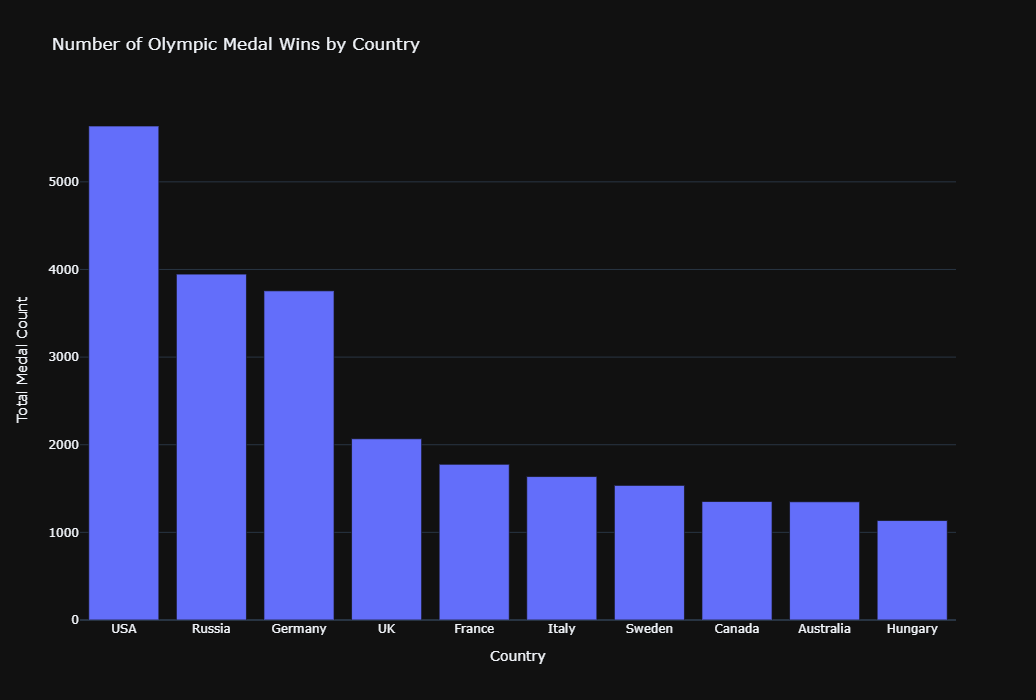

In [143]:
# Asssign top 10 winningest countries table to a variable
top_ten_winners = (clean_olympics_df["Country"].value_counts().head(10).reset_index())

# Rename columns
top_ten_winners.columns = ["Country", "Total Medal Count"]

# Visualize the table as a bar chart
top_ten_winners_graph = px.bar(top_ten_winners,
                               x = "Country",
                               y = "Total Medal Count",
                               title = "Number of Olympic Medal Wins by Country")

top_ten_winners_graph.update_layout(yaxis_categoryorder = "total descending",
                                 template = "plotly_dark",
                                 height = 700,
                                 width = 1000)

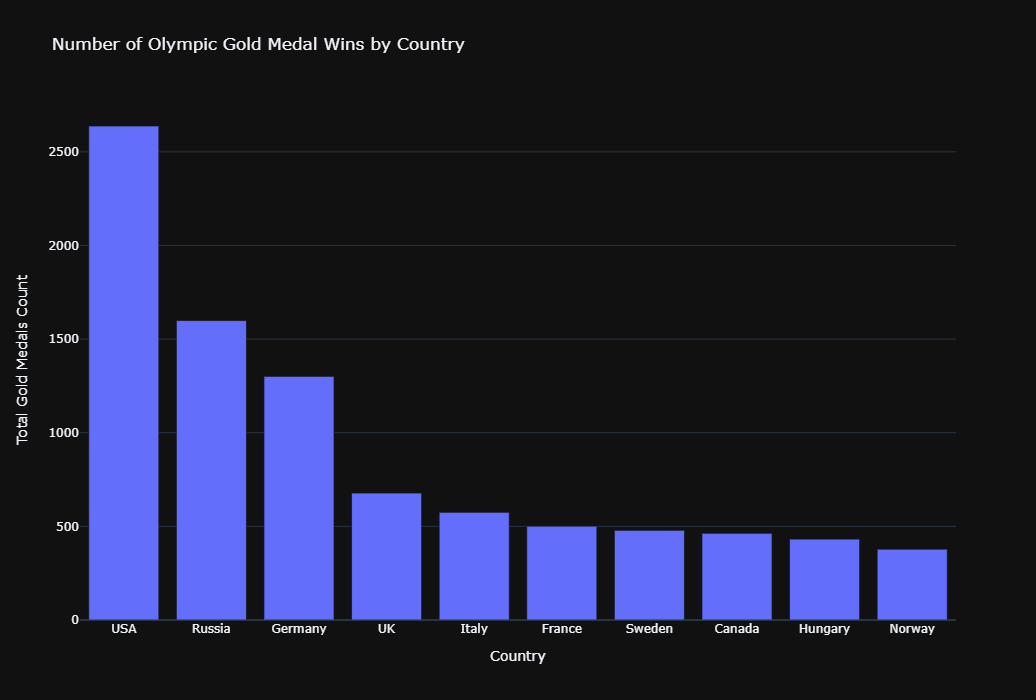

In [144]:
# ADDED TASK
gold_winners_df = clean_olympics_df[clean_olympics_df["Medal"] == "Gold"]
gold_winners_df["Country"].value_counts().head(10).reset_index()

# Rename columns
top_ten_gold_winners.columns = ["Country", "Total Gold Medals Count"]

# Visualize the table as a bar chart
top_ten_gold_winners_graph = px.bar(top_ten_gold_winners,
                               x = "Country",
                               y = "Total Gold Medals Count",
                               title = "Number of Olympic Gold Medal Wins by Country")

top_ten_gold_winners_graph.update_layout(yaxis_categoryorder = "total descending",
                                 template = "plotly_dark",
                                 height = 700,
                                 width = 1000)